# Simulation without the GUI

First update the system path the include ``ising_sim``.

In [1]:
import sys
sys.path.append("..")

Define the length of the 1D chain.

In [2]:
N = 200

Create an Ising Simulation. This has the optional arguments ``J``, ``local_fields``, and ``initial_state``. ``J < 0`` is ferromagnetic, and ``J > 0`` is antiferromagnetic; ``J = -1``by default. The ``local_fields`` are all 0 by default. ``initial_state`` is all 1's by default.

In [3]:
from ising_sim.sim import IsingSimulation

sim = IsingSimulation(N, J=-1)

Simulate at temperature 4, 3, 2, and 1 each for 100 time steps, then at temperature 0.5 for 50 time steps, and then at temperature 0.25 for 200 time steps.

In [4]:
schedule = (4, 100), (3, 100), (2, 100), (1, 100), (.5, 50), (.25, 200)
sim.schedule_update(schedule)

Now let's get the last 100 states that we ended with to estimate the correlation between the 0th spin and all the others.

In [5]:
past_states = sim.get_past_states(num_states=100)

Now we estimate the correlation function as a function of distance by averaging over the past states.

In [6]:
from ising_sim import compute_correlations

correlations = compute_correlations(past_states)

Now we plot it.

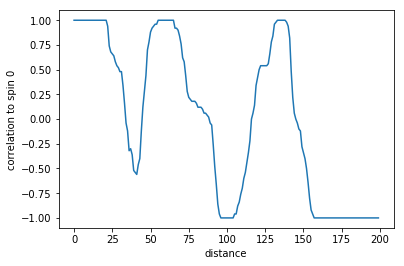

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(correlations)
plt.xlabel('distance')
plt.ylabel('correlation to spin 0')
plt.show()

Try adjusting the sign and strength of ``J``.